# Bike Sharing Prediction


#### Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

#### Reading and understanding csv file



In [2]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# droping instant as it is index of record, dteday as we already have seperate month and year, casual and registered as they are sum of total bike count
df = df.drop(['instant','dteday','casual','registered'], axis=1)

In [6]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [7]:
#Renaming mnth column
df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df.mnth.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [8]:
#Renaming season column
df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
df.season.value_counts(normalize=True)


Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [9]:
#Renaming weekday column
df.weekday.replace((0,1,2,3,4,5,6), ('Tue','Wed','Thurs','Fri','Sat','Sun','Mon'), inplace=True)
df.weekday.value_counts(normalize=True)

Mon      0.143836
Tue      0.143836
Wed      0.143836
Thurs    0.142466
Sat      0.142466
Sun      0.142466
Fri      0.141096
Name: weekday, dtype: float64

In [10]:
#Renaming weathersit column
df.weathersit.replace((1,2,3), ('Clear','Light_rainfall','Thunderstrom'), inplace=True)
df.weathersit.value_counts(normalize=True)

Clear             0.634247
Light_rainfall    0.336986
Thunderstrom      0.028767
Name: weathersit, dtype: float64

####    Vizualising data for better understanding

<AxesSubplot: xlabel='temp', ylabel='cnt'>

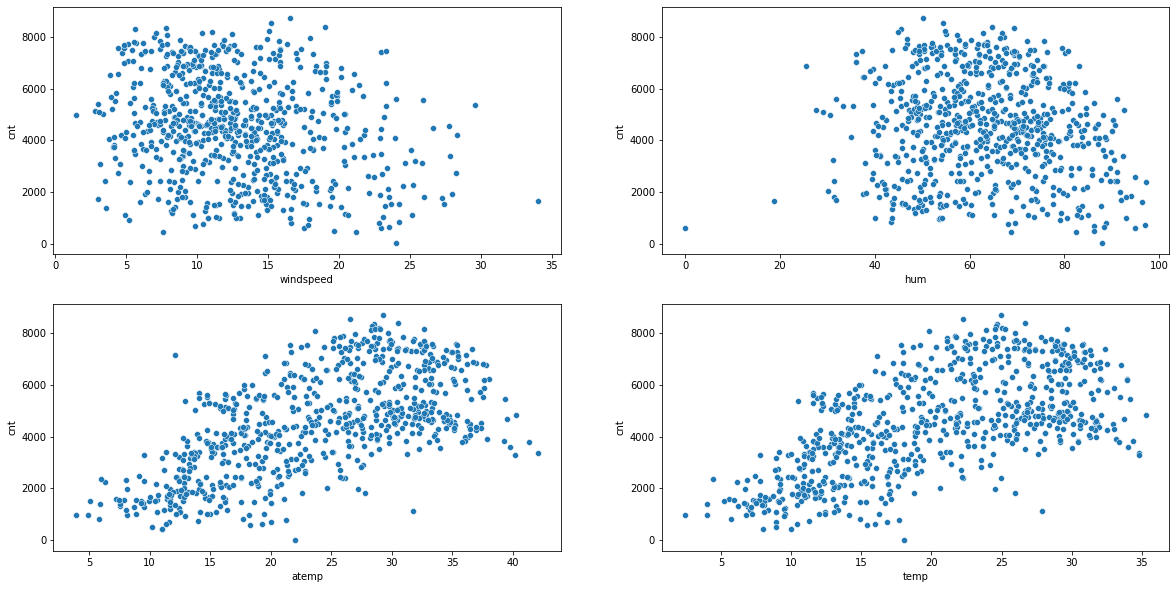

In [11]:
# visualizing numeric data
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='windspeed', y='cnt')
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='hum', y='cnt')
plt.subplot(2,2,3)
sns.scatterplot(data=df, x='atemp', y='cnt')
plt.subplot(2,2,4)
sns.scatterplot(data=df, x='temp', y='cnt')

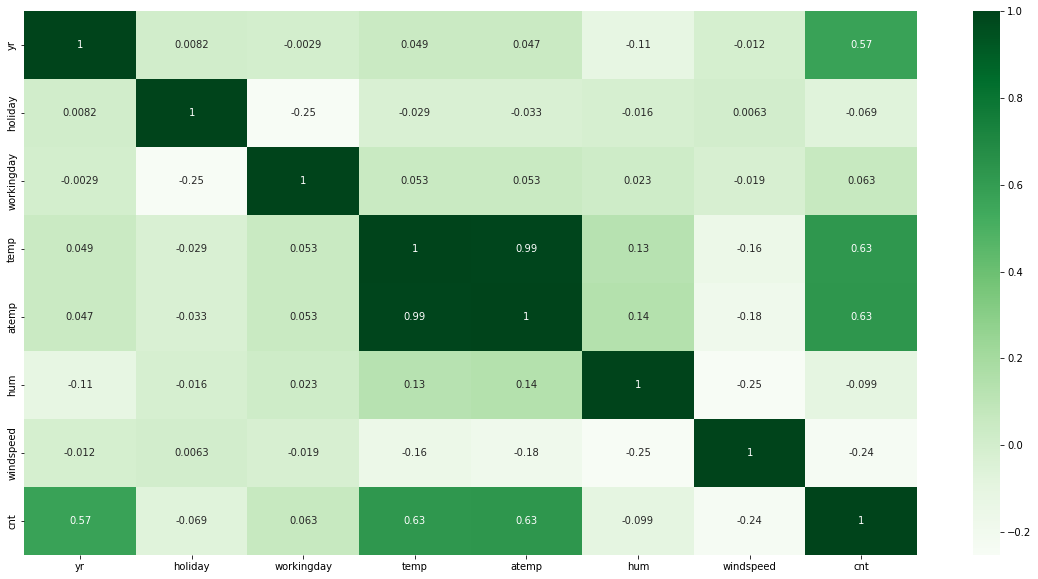

In [12]:
#checking correleation of data
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

##### atemp and temp has strong positive correlecation with bike count follow by year

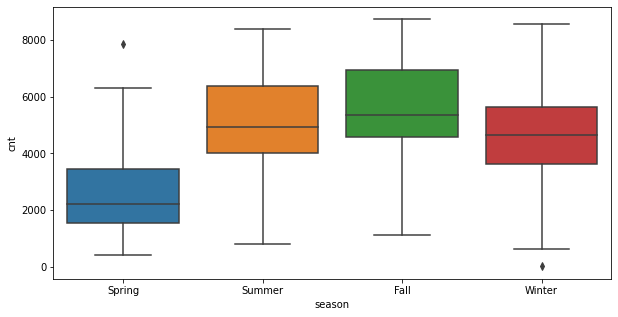

In [13]:
#vizualizing categorical data
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.show()

##### summer and fall season has more rented bikes 

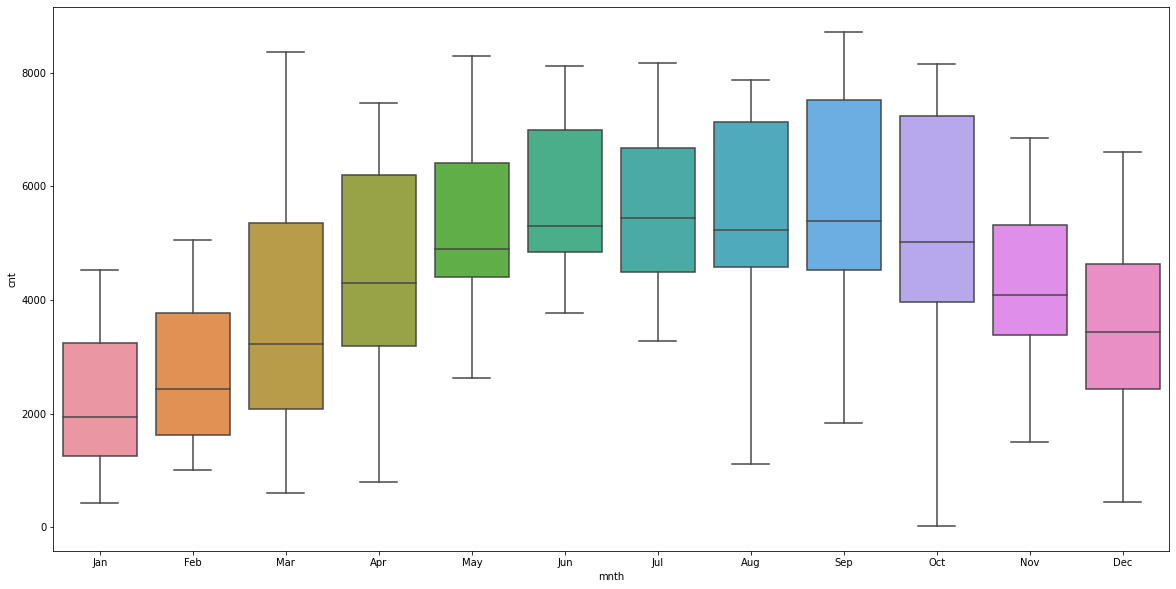

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.show()

#### renting of bikes are increasing after 3rd month significantly

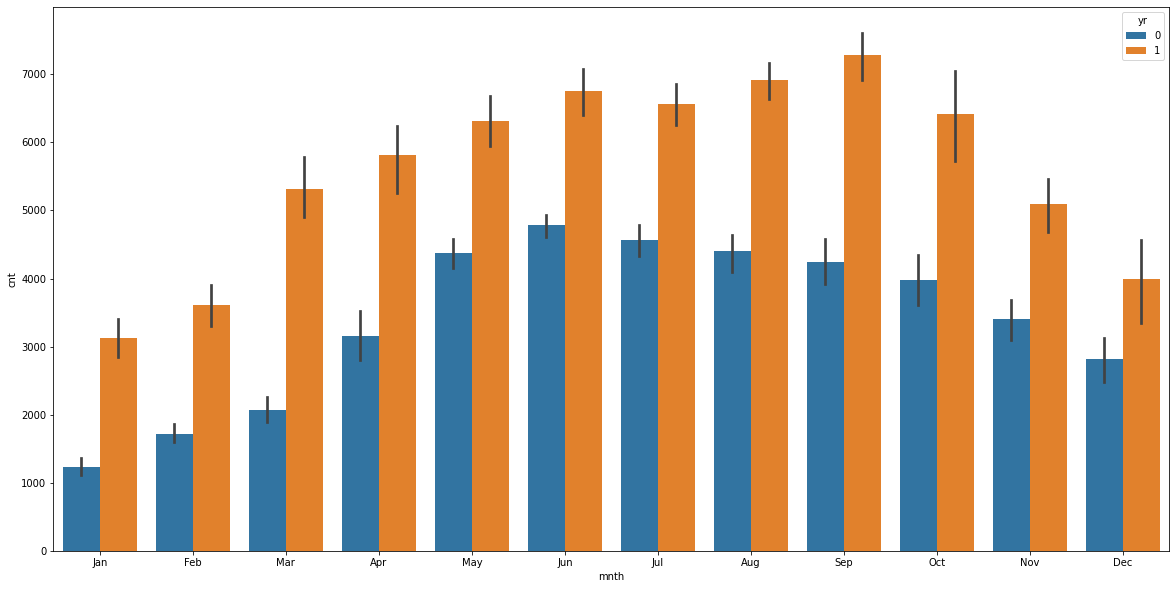

In [15]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'mnth', y = 'cnt', data = df, hue='yr')
plt.show()

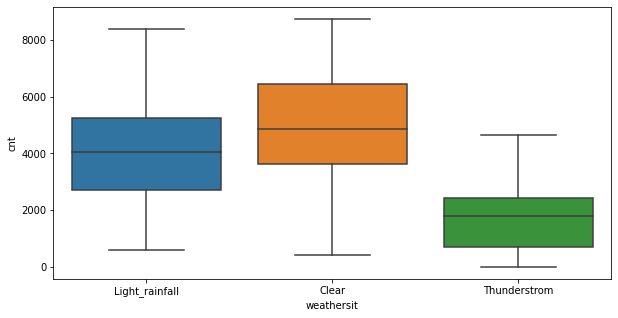

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### mostly bikes are rented in clear or partially cloudy day

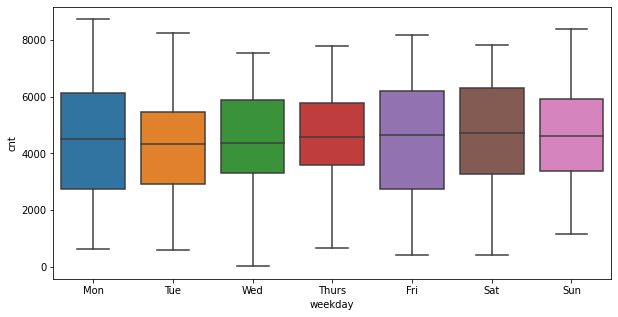

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

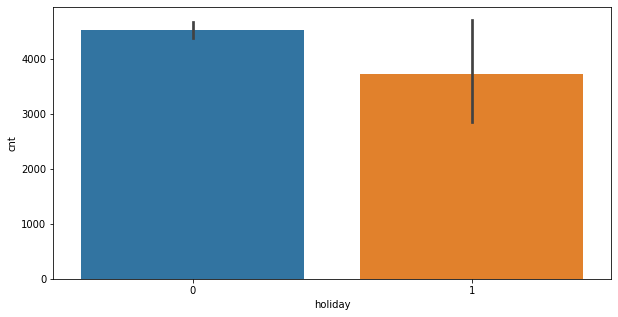

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'holiday', y = 'cnt', data = df)
plt.show()

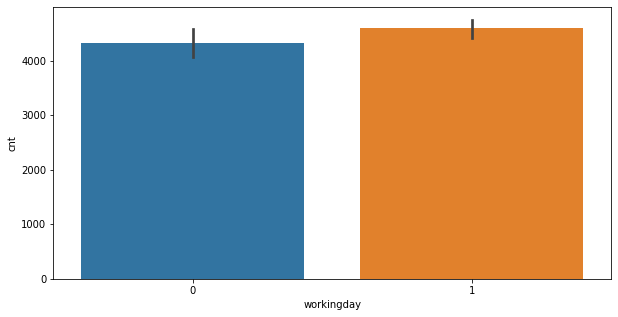

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

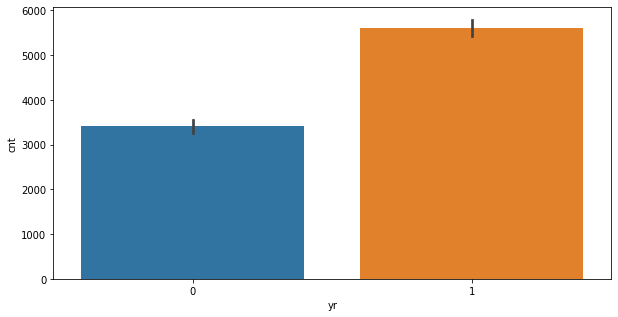

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'yr', y = 'cnt', data = df)
plt.show()

#### Bike rented in year 2019 is almost double of previous year

## Preparing data for modeling

In [21]:
#creating dummy variables for more than 2 values
#for month
month = pd.get_dummies(df['mnth'], drop_first = True)
 
# for season
season = pd.get_dummies(df['season'], drop_first = True)

#for weathersit
weather = pd.get_dummies(df['weathersit'], drop_first = True)

#for weekday
week = pd.get_dummies(df['weekday'], drop_first = True)


In [22]:
# concating season, month, weather and week to dataframe 
df = pd.concat([df,season,month,weather,week], axis = 1)


In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
0,Spring,0,Jan,0,Mon,0,Light_rainfall,14.110847,18.18125,80.5833,...,0,0,1,0,1,0,0,0,0,0
1,Spring,0,Jan,0,Tue,0,Light_rainfall,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,1,0
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# dropping columns from which dummy variables are created
df = df.drop(['mnth','weekday','season','weathersit'], axis=1)

In [25]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df.shape

(730, 30)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Spring          730 non-null    uint8  
 9   Summer          730 non-null    uint8  
 10  Winter          730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

In [28]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.336986,0.028767,0.143836,0.142466,0.142466,0.142466,0.143836,0.143836
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.473004,0.167266,0.351164,0.349767,0.349767,0.349767,0.351164,0.351164
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting data into train and test

In [29]:
df_train, df_test = train_test_split(df, train_size= 0.7, random_state=80)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Rescaling the features

In [30]:
#creating list of numeric variables
num_var = ['temp','atemp','hum','windspeed','cnt']
scaler = MinMaxScaler()

df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
129,0,0,1,0.579261,0.571226,0.502999,0.152073,0.550046,0,1,...,0,0,0,0,0,0,0,1,0,0
672,1,0,0,0.304674,0.310891,0.547987,0.289365,0.585021,0,0,...,0,0,0,0,0,0,0,0,1,0
255,0,0,1,0.736484,0.680157,0.732648,0.208631,0.545444,0,0,...,0,1,0,0,0,0,0,1,0,0
523,1,0,1,0.734271,0.672486,0.481149,0.281304,0.887483,0,1,...,0,0,0,0,0,0,1,0,0,0
257,0,0,1,0.639050,0.612934,0.729221,0.488556,0.418431,0,0,...,0,1,1,0,0,1,0,0,0,0


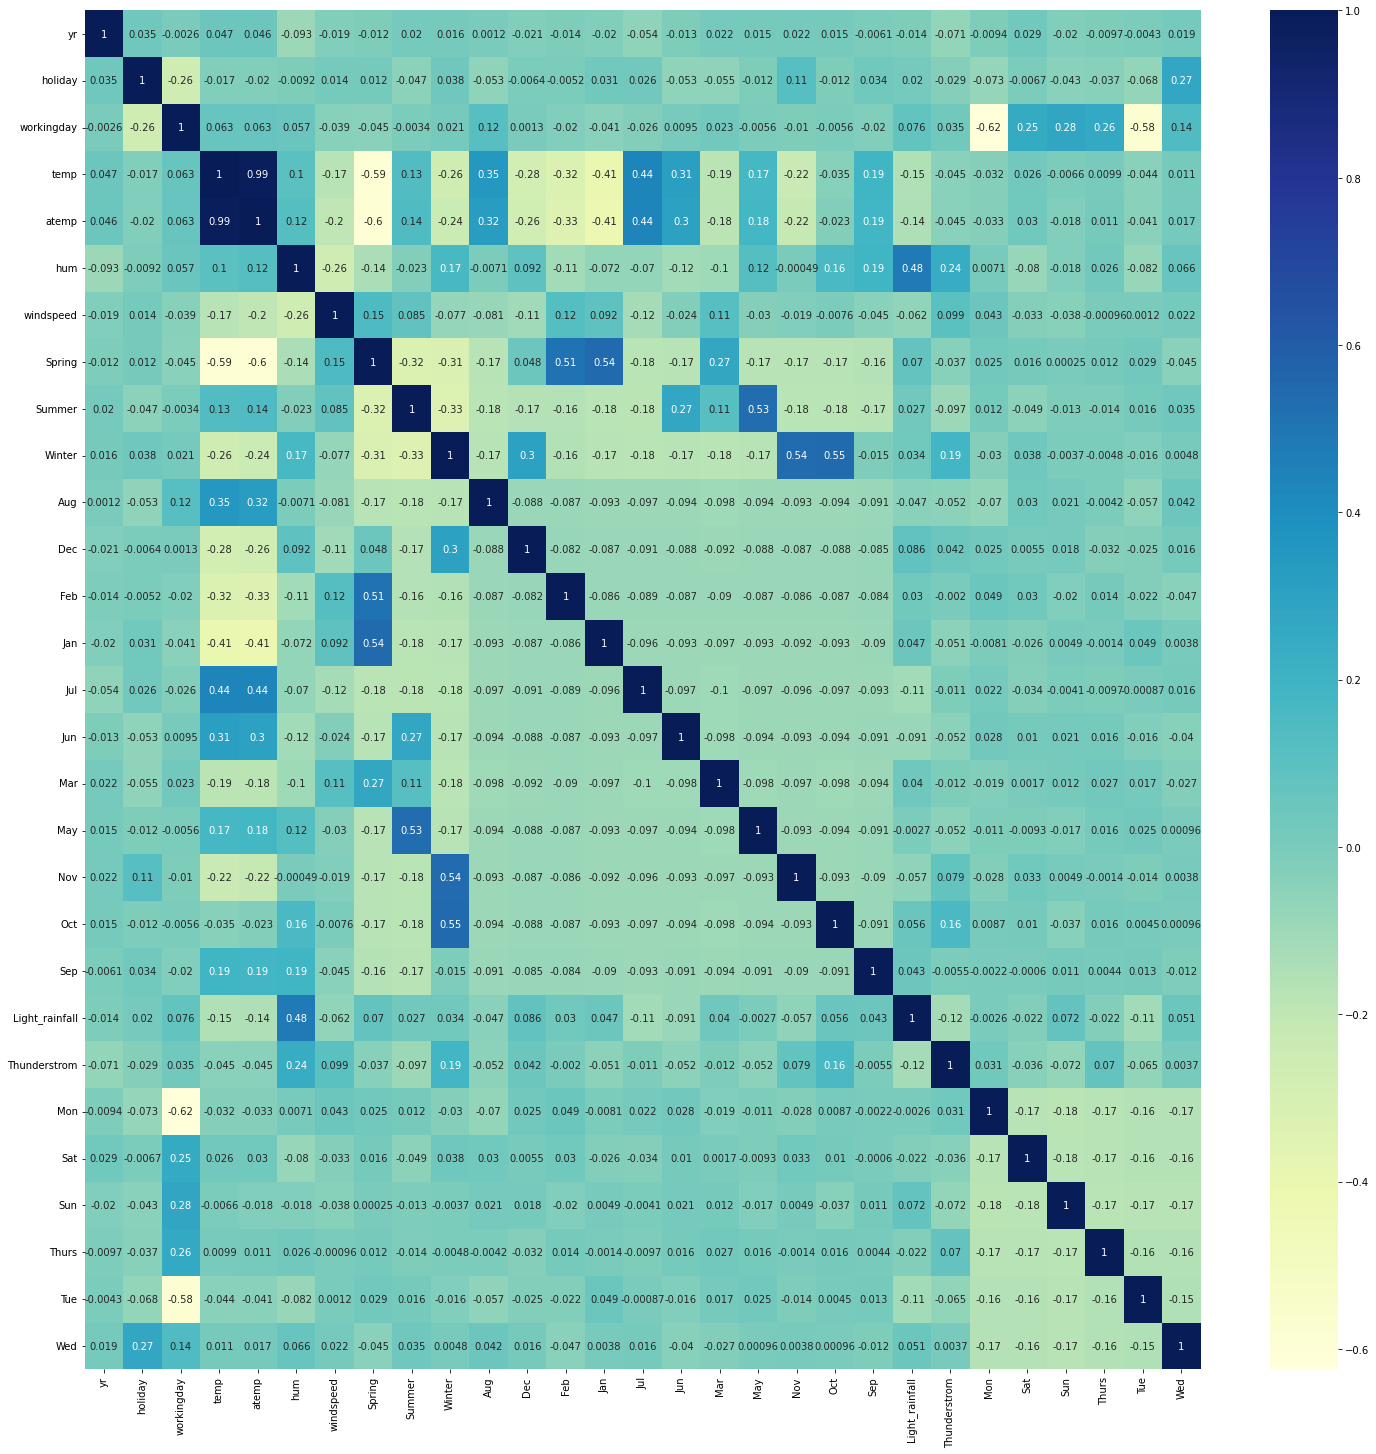

In [74]:
plt.figure(figsize=(25,25))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Training the model

In [32]:
#X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [33]:
y_train.head()

129    0.550046
672    0.585021
255    0.545444
523    0.887483
257    0.418431
Name: cnt, dtype: float64

In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
129,0,0,1,0.579261,0.571226,0.502999,0.152073,0,1,0,...,0,0,0,0,0,0,0,1,0,0
672,1,0,0,0.304674,0.310891,0.547987,0.289365,0,0,1,...,0,0,0,0,0,0,0,0,1,0
255,0,0,1,0.736484,0.680157,0.732648,0.208631,0,0,0,...,0,1,0,0,0,0,0,1,0,0
523,1,0,1,0.734271,0.672486,0.481149,0.281304,0,1,0,...,0,0,0,0,0,0,1,0,0,0
257,0,0,1,0.639050,0.612934,0.729221,0.488556,0,0,0,...,0,1,1,0,0,1,0,0,0,0


In [35]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Light_rainfall', 'Thunderstrom',
       'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed'],
      dtype='object')

In [36]:
X_train.columns = X_train.columns.astype(str)

### Using RFE(Recursive feature elimination)

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [38]:
# Checking which parameters have been selected in that list of 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 6),
 ('Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 4),
 ('Feb', False, 14),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 9),
 ('May', False, 10),
 ('Nov', False, 3),
 ('Oct', False, 12),
 ('Sep', False, 15),
 ('Light_rainfall', True, 1),
 ('Thunderstrom', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 11),
 ('Sun', False, 13),
 ('Thurs', False, 8),
 ('Tue', True, 1),
 ('Wed', False, 7)]

In [39]:
# storing the selected 15 variables 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Aug', 'Jul', 'Jun', 'Light_rainfall', 'Thunderstrom', 'Mon',
       'Tue'],
      dtype='object')

In [40]:
# checking which columns have been removed
X_train.columns[~rfe.support_]

Index(['atemp', 'Summer', 'Dec', 'Feb', 'Jan', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Sat', 'Sun', 'Thurs', 'Wed'],
      dtype='object')

### Building model using statsmodel for detail statistics

In [41]:
# Creating X_train  with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.09e-177
Time:                        10:36:25   Log-Likelihood:                 489.78
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     495   BIC:                            -886.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2672      0.026     10.436      0.000       0.217       0.318
yr                 0.2292      0.009     26.863      0.000       0.212       0.246
holiday            0.0027      0.021      0.130      0.897      -0.038       0.044
workingday         0.0896      0.010      9.429      0.000       0.071       0.108
temp               0.5306      0.034     15.700      0.000       0.464       0.597
hum               -0.1932      0.039     -4.922      0.000      -0.270      -0.116
windspeed         -0.1660      0.028     -6.011      0.000      -0.220      -0.112
Spring            -0.1113      0.015     -7.217      0.000      -0.142      -0.081
Winter             0.0471      0.013      3.543      0.000       0.021       0.073
Aug               -0.0632      0.018     -3.439      0.001      -0.099      -0.027
Jul               -0.1247      0.019     -6.412      0.000      -0.163      -0.086
Jun               -0.0552      0.018     -3.033      0.003      -0.091      -0.019
Light_rainfall    -0.0453      0.011     -4.107      0.000      -0.067      -0.024
Thunderstrom      -0.2098      0.029     -7.344      0.000      -0.266      -0.154
Mon                0.1040      0.012      8.641      0.000       0.080       0.128
Tue                0.0709      0.012      5.824      0.000       0.047       0.095
==============================================================================
Omnibus:                       66.427   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.227
Skew:                          -0.715   Prob(JB):                     4.80e-32
Kurtosis:                       5.177   Cond. No.                     9.80e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# calculating VIF of model using varience influenece factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_cal(df):
    vif = pd.DataFrame()
    X = df
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [46]:
vif_cal(X_train_rfe)

,features,VIF
2,holiday,inf
3,workingday,inf
14,Mon,inf
15,Tue,inf
4,temp,3.941160
7,Spring,2.482256
5,hum,1.948939
8,Winter,1.862509
10,Jul,1.790518
12,Light_rainfall,1.583208


In [47]:
#  removing holiday as its showing high collinearity
X_train_new = X_train_rfe.drop('holiday', axis=1)


In [48]:
# second model
X_train_new = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train, X_train_new).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.9
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.09e-177
Time:                        10:36:44   Log-Likelihood:                 489.78
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     495   BIC:                            -886.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2700      0.040      6.768      0.000       0.192       0.348
yr                 0.2292      0.009     26.863      0.000       0.212       0.246
workingday         0.0869      0.025      3.485      0.001       0.038       0.136
temp               0.5306      0.034     15.700      0.000       0.464       0.597
hum               -0.1932      0.039     -4.922      0.000      -0.270      -0.116
windspeed         -0.1660      0.028     -6.011      0.000      -0.220      -0.112
Spring            -0.1113      0.015     -7.217      0.000      -0.142      -0.081
Winter             0.0471      0.013      3.543      0.000       0.021       0.073
Aug               -0.0632      0.018     -3.439      0.001      -0.099      -0.027
Jul               -0.1247      0.019     -6.412      0.000      -0.163      -0.086
Jun               -0.0552      0.018     -3.033      0.003      -0.091      -0.019
Light_rainfall    -0.0453      0.011     -4.107      0.000      -0.067      -0.024
Thunderstrom      -0.2098      0.029     -7.344      0.000      -0.266      -0.154
Mon                0.1013      0.027      3.791      0.000       0.049       0.154
Tue                0.0682      0.027      2.525      0.012       0.015       0.121
==============================================================================
Omnibus:                       66.427   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.227
Skew:                          -0.715   Prob(JB):                     4.80e-32
Kurtosis:                       5.177   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif_cal(X_train_new)

,features,VIF
0,const,91.800692
2,workingday,7.674852
13,Mon,5.223349
14,Tue,4.802537
3,temp,3.941160
6,Spring,2.482256
4,hum,1.948939
7,Winter,1.862509
9,Jul,1.790518
11,Light_rainfall,1.583208


In [50]:
#droppping column workingday as its showing high vif
X_train_new = X_train_new.drop('workingday', axis=1)


In [51]:
X_train_new = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train, X_train_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     176.0
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          3.14e-176
Time:                        10:37:52   Log-Likelihood:                 483.60
No. Observations:                 510   AIC:                            -939.2
Df Residuals:                     496   BIC:                            -879.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3547      0.032     11.097      0.000       0.292       0.418
yr                 0.2284      0.009     26.485      0.000       0.211       0.245
temp               0.5271      0.034     15.430      0.000       0.460       0.594
hum               -0.1909      0.040     -4.811      0.000      -0.269      -0.113
windspeed         -0.1676      0.028     -6.003      0.000      -0.222      -0.113
Spring            -0.1125      0.016     -7.218      0.000      -0.143      -0.082
Winter             0.0454      0.013      3.384      0.001       0.019       0.072
Aug               -0.0592      0.019     -3.192      0.002      -0.096      -0.023
Jul               -0.1250      0.020     -6.359      0.000      -0.164      -0.086
Jun               -0.0518      0.018     -2.817      0.005      -0.088      -0.016
Light_rainfall    -0.0457      0.011     -4.101      0.000      -0.068      -0.024
Thunderstrom      -0.2065      0.029     -7.152      0.000      -0.263      -0.150
Mon                0.0180      0.012      1.489      0.137      -0.006       0.042
Tue               -0.0149      0.013     -1.163      0.245      -0.040       0.010
==============================================================================
Omnibus:                       80.273   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.215
Skew:                          -0.840   Prob(JB):                     1.21e-39
Kurtosis:                       5.369   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_cal(X_train_new)

,features,VIF
0,const,57.669450
2,temp,3.937668
5,Spring,2.480968
3,hum,1.948397
6,Winter,1.860180
8,Jul,1.790474
10,Light_rainfall,1.583006
7,Aug,1.532126
9,Jun,1.504553
11,Thunderstrom,1.255978


In [53]:
# dropping Tye
X_train_new = X_train_new.drop('Tue', axis=1)

In [54]:
X_train_new = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train, X_train_new).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     190.4
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          4.36e-177
Time:                        10:38:51   Log-Likelihood:                 482.90
No. Observations:                 510   AIC:                            -939.8
Df Residuals:                     497   BIC:                            -884.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3507      0.032     11.032      0.000       0.288       0.413
yr                 0.2285      0.009     26.488      0.000       0.212       0.245
temp               0.5286      0.034     15.480      0.000       0.461       0.596
hum               -0.1912      0.040     -4.818      0.000      -0.269      -0.113
windspeed         -0.1673      0.028     -5.991      0.000      -0.222      -0.112
Spring            -0.1121      0.016     -7.189      0.000      -0.143      -0.081
Winter             0.0460      0.013      3.432      0.001       0.020       0.072
Aug               -0.0579      0.019     -3.126      0.002      -0.094      -0.022
Jul               -0.1249      0.020     -6.349      0.000      -0.164      -0.086
Jun               -0.0513      0.018     -2.790      0.005      -0.087      -0.015
Light_rainfall    -0.0442      0.011     -3.992      0.000      -0.066      -0.022
Thunderstrom      -0.2040      0.029     -7.083      0.000      -0.261      -0.147
Mon                0.0203      0.012      1.709      0.088      -0.003       0.044
==============================================================================
Omnibus:                       79.705   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.392
Skew:                          -0.842   Prob(JB):                     1.35e-38
Kurtosis:                       5.318   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif_cal(X_train_new)

,features,VIF
0,const,56.992161
2,temp,3.931990
5,Spring,2.479558
3,hum,1.948282
6,Winter,1.857210
8,Jul,1.790400
10,Light_rainfall,1.562043
7,Aug,1.526399
9,Jun,1.503736
11,Thunderstrom,1.249245


Now all VIF is less than 5 

In [56]:
#dropping Mon as its has more than 0.05 p value
X_train_new = X_train_new.drop('Mon', axis=1)

In [57]:
X_train_new = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train, X_train_new).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.6
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.26e-177
Time:                        10:39:22   Log-Likelihood:                 481.41
No. Observations:                 510   AIC:                            -938.8
Df Residuals:                     498   BIC:                            -888.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3535      0.032     11.113      0.000       0.291       0.416
yr                 0.2286      0.009     26.447      0.000       0.212       0.246
temp               0.5258      0.034     15.386      0.000       0.459       0.593
hum               -0.1889      0.040     -4.753      0.000      -0.267      -0.111
windspeed         -0.1655      0.028     -5.920      0.000      -0.220      -0.111
Spring            -0.1127      0.016     -7.219      0.000      -0.143      -0.082
Winter             0.0450      0.013      3.349      0.001       0.019       0.071
Aug               -0.0590      0.019     -3.178      0.002      -0.095      -0.023
Jul               -0.1236      0.020     -6.275      0.000      -0.162      -0.085
Jun               -0.0501      0.018     -2.721      0.007      -0.086      -0.014
Light_rainfall    -0.0445      0.011     -4.015      0.000      -0.066      -0.023
Thunderstrom      -0.2031      0.029     -7.039      0.000      -0.260      -0.146
==============================================================================
Omnibus:                       75.294   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.627
Skew:                          -0.785   Prob(JB):                     5.39e-38
Kurtosis:                       5.369   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* const : The Constant value of ‘0.3535’ indicated that, in the absence of all other predictor variables bike rental can still increase by 0.3535 units
* yr : '0.223’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.223 units
* hum : ‘-0.189’ indicated that a unit increase in  Aug variable descreases the bike hire numbers by 0.189 units
* temp : ‘0.526’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.526 units
* windspeed :‘-0.165’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.165 units
* Spring : ‘-0.113’ indicated that a unit increase in spring variable decreases the bike hire numbers by 0.113 units
* Winter : ‘0.045’ indicated that a unit increase in Winter variable increases the bike hire numbers by 0.045 units
* Aug : ‘-0.056’ indicated that a unit increase in  Aug variable descreases the bike hire numbers by 0.056 units
* Jul: ‘-0.124’ indicated that a unit increase in  Jul variable descreases the bike hire numbers by 0.124 units
* Jun : ‘-0.050’ indicated that a unit increase in  Jun variable descreases the bike hire numbers by 0.050 units
* Light_rainfall : ‘-0.045’ indicated that a unit increase in variable descreases the bike hire numbers by 0.045 units
* Thunderstrom : ‘-0.203’ indicated that a unit increase in  Aug variable descreases the bike hire numbers by 0.203 units

In [58]:
vif_cal(X_train_new)

,features,VIF
0,const,56.842208
2,temp,3.922915
5,Spring,2.478133
3,hum,1.945969
6,Winter,1.853069
8,Jul,1.787611
10,Light_rainfall,1.561567
7,Aug,1.524721
9,Jun,1.501482
11,Thunderstrom,1.248831


### Residual Analysis

In [59]:
y_train_pred = lm3.predict(X_train_new)

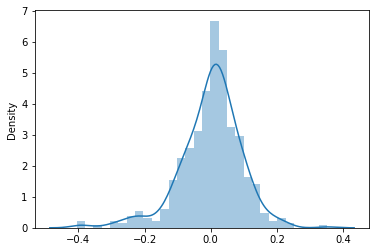

In [60]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

### Prediction and evaluation on the Test set

In [61]:
#creating list of numeric variables
num_var = ['temp','atemp','hum','windspeed','cnt']

df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
254,0,0,1,0.727868,0.678238,0.711747,0.094163,0.539692,0,0,...,0,1,0,0,0,0,0,0,0,1
5,0,0,1,0.143263,0.181078,0.532916,0.095574,0.182237,1,0,...,0,0,0,0,0,1,0,0,0,0
345,0,0,1,0.188417,0.230922,0.689803,0.039055,0.378279,0,0,...,0,0,0,0,0,0,0,0,0,1
144,0,0,1,0.749771,0.696312,0.715938,0.235530,0.570179,0,1,...,0,0,0,0,0,0,0,0,0,0
423,1,0,1,0.348963,0.343216,0.407026,0.320333,0.499425,1,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.504545,0.027273,0.668182,0.516968,0.496569,0.648491,0.309589,0.512298,0.268182,0.254545,...,0.081818,0.086364,0.318182,0.031818,0.131818,0.131818,0.109091,0.145455,0.172727,0.163636
std,0.501120,0.163248,0.471940,0.239733,0.216684,0.142358,0.175734,0.224211,0.444023,0.436599,...,0.274713,0.281541,0.466833,0.175916,0.339064,0.339064,0.312464,0.353363,0.378873,0.370789
min,0.000000,0.000000,0.000000,-0.049680,-0.026641,0.360326,-0.049804,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.316023,0.331092,0.532185,0.175981,0.357369,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.505632,0.499755,0.653385,0.286012,0.511908,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714088,0.667393,0.751393,0.409510,0.686321,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.016608,0.951509,0.975076,0.806183,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
y_test = df_test.pop('cnt')
X_test = df_test

In [64]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,...,Oct,Sep,Light_rainfall,Thunderstrom,Mon,Sat,Sun,Thurs,Tue,Wed
254,1.0,0,0,1,0.727868,0.678238,0.711747,0.094163,0,0,...,0,1,0,0,0,0,0,0,0,1
5,1.0,0,0,1,0.143263,0.181078,0.532916,0.095574,1,0,...,0,0,0,0,0,1,0,0,0,0
345,1.0,0,0,1,0.188417,0.230922,0.689803,0.039055,0,0,...,0,0,0,0,0,0,0,0,0,1
144,1.0,0,0,1,0.749771,0.696312,0.715938,0.235530,0,1,...,0,0,0,0,0,0,0,0,0,0
423,1.0,1,0,1,0.348963,0.343216,0.407026,0.320333,1,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
X_train_new.columns

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'Spring', 'Winter', 'Aug',
       'Jul', 'Jun', 'Light_rainfall', 'Thunderstrom'],
      dtype='object')

In [66]:
#Selecting the variables that were part of final model.
X_test_final = X_test_sm[['const','yr','temp','hum','windspeed','Spring','Winter','Jul','Jun','Aug','Light_rainfall','Thunderstrom']]

In [67]:
y_test_pred = lm3.predict(X_test_final)

In [68]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8343684040243817

* Trained R2_score = .820
* Test_R2_score = .834 showing model is working good
* also F-statistic value is high that is 206.6
* Prob (F-statistic) is low that is 1.26e-177 